# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [3]:
# This cell performs a step in the EDA process
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [4]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [5]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [6]:
# Create new columns for the difference between oldbalanceOrg and newbalanceOrig 
transactions['balance_change'] = transactions['oldbalanceOrg'] - transactions['newbalanceOrig']
transactions['balance_change'].describe()

count    1000000.00
mean      -21392.04
std       142534.18
min     -1609288.12
25%            0.00
50%            0.00
75%        10127.96
max     10000000.00
Name: balance_change, dtype: float64

<Axes: ylabel='Density'>

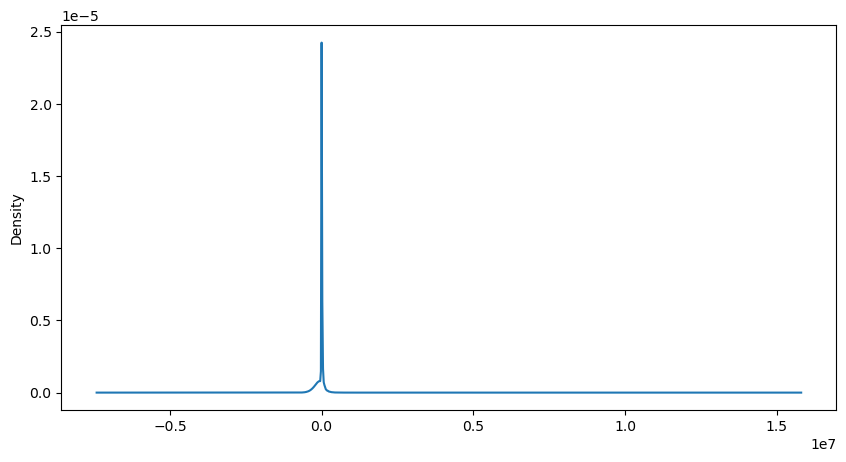

In [7]:
# This cell performs a step in the EDA process
transactions['balance_change'].plot(kind='density', figsize=(10, 5))


In [8]:
# TODO: Begin your EDA
transactions.info()
transactions.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
 10  balance_change  1000000 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 83.9+ MB


type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
balance_change    0
dtype: int64

In [9]:
# This cell performs a step in the EDA process
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00
mean,179620.78,835118.38,856510.42,1102855.75,1227858.95,0.00,0.00,-21392.04
std,607618.14,2892918.23,2928896.36,3464914.58,3752687.91,0.04,0.00,142534.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1609288.12
25%,13369.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,74435.00,14110.00,0.00,133184.93,214865.17,0.00,0.00,0.00
75%,208340.45,107380.37,144656.64,943020.88,1110701.57,0.00,0.00,10127.96
max,92445516.64,39585040.37,38939424.03,355553416.30,356015889.35,1.00,1.00,10000000.00


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

In [33]:
# COUNT THE NUMBER OF FRAUDULENT TRANSACTIONS BY TYPE. ONLY CASH OUT AND TRANSFER ARE FRAUDULENT
transactions.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          219955
CASH_OUT  0          350703
          1             657
DEBIT     0            6417
PAYMENT   0          338573
TRANSFER  0           83055
          1             640
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

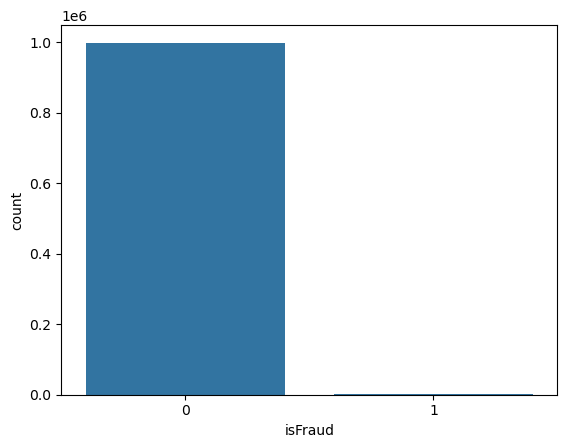

In [11]:
# Visualize the target variable
sns.countplot(x='isFraud', data=transactions)

## First thing I notics is theres a huge class imbalance. 
## I'm also thinking about dropping the non predictive columns.
## I'll also need to check the correlation between the columns to see if there are any multicoll.
## But lets just look at some more distributions and see what pops up

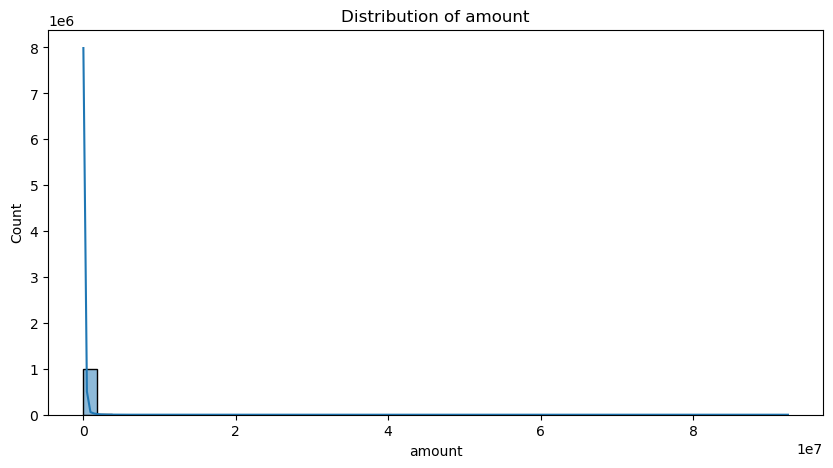

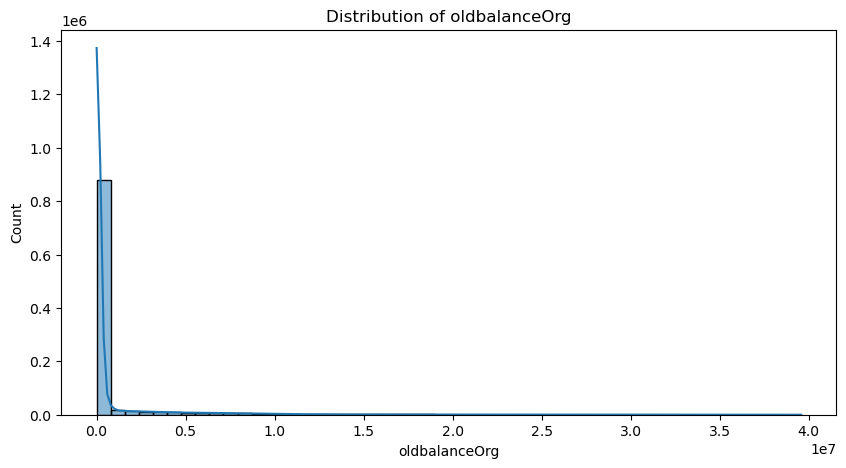

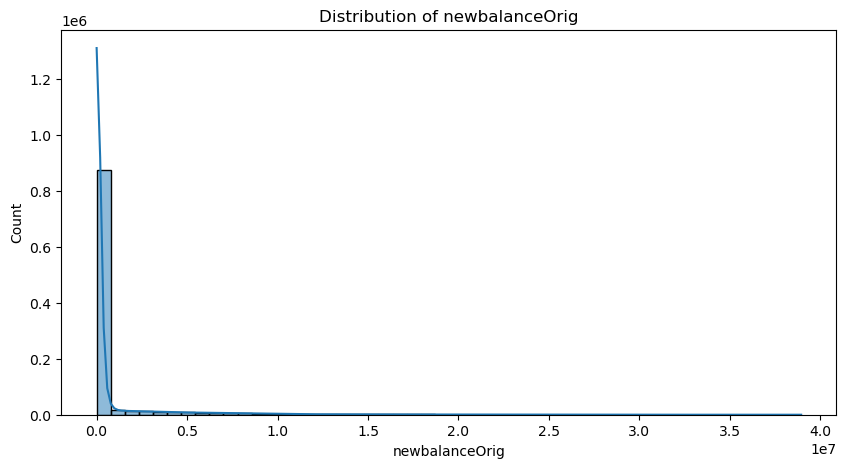

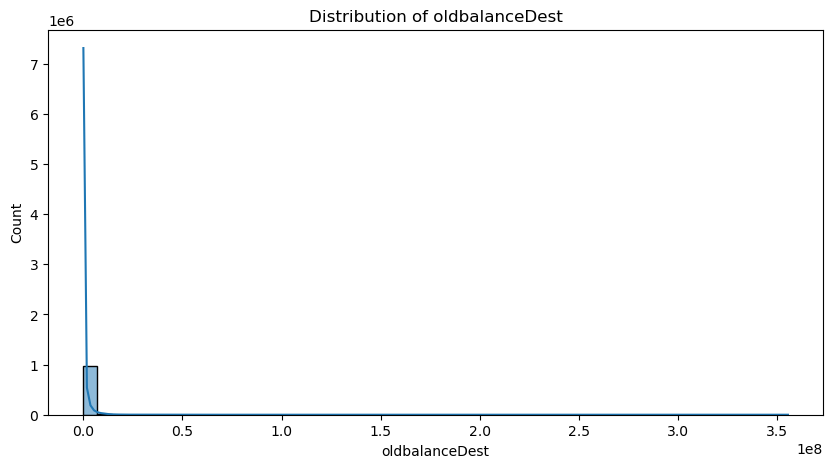

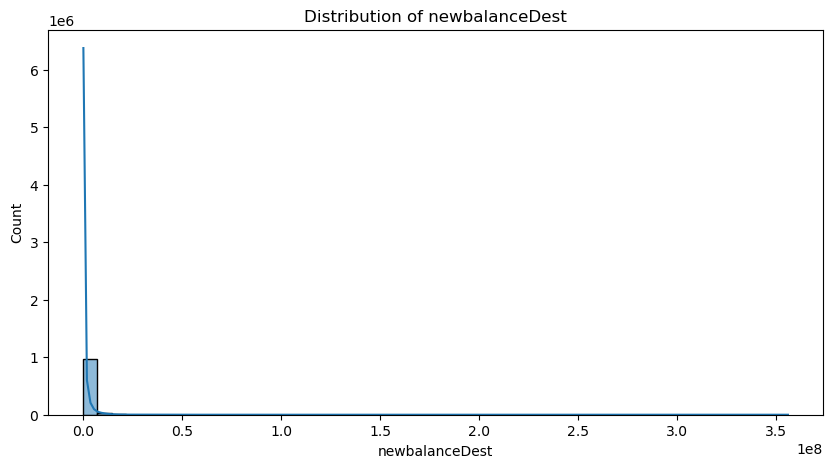

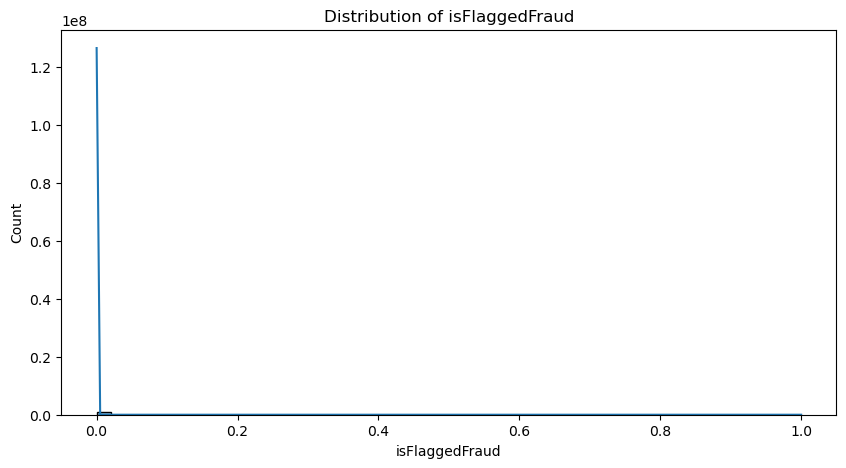

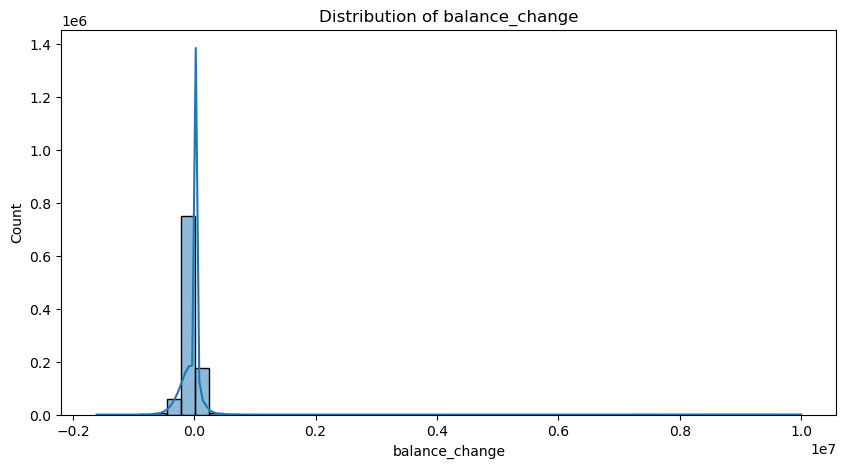

In [ ]:
### Plot the distributions of the numerical columns
num_cols = transactions.select_dtypes(include=np.number).columns.tolist()# Select numerical columns
num_cols.remove('isFraud') # Remove the target column
#num_cols.remove('nameDest') # Remove the target column  
# I am gonna plot all numerical columns below in a different cell to display better visual results.
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(transactions[col], kde=True,bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

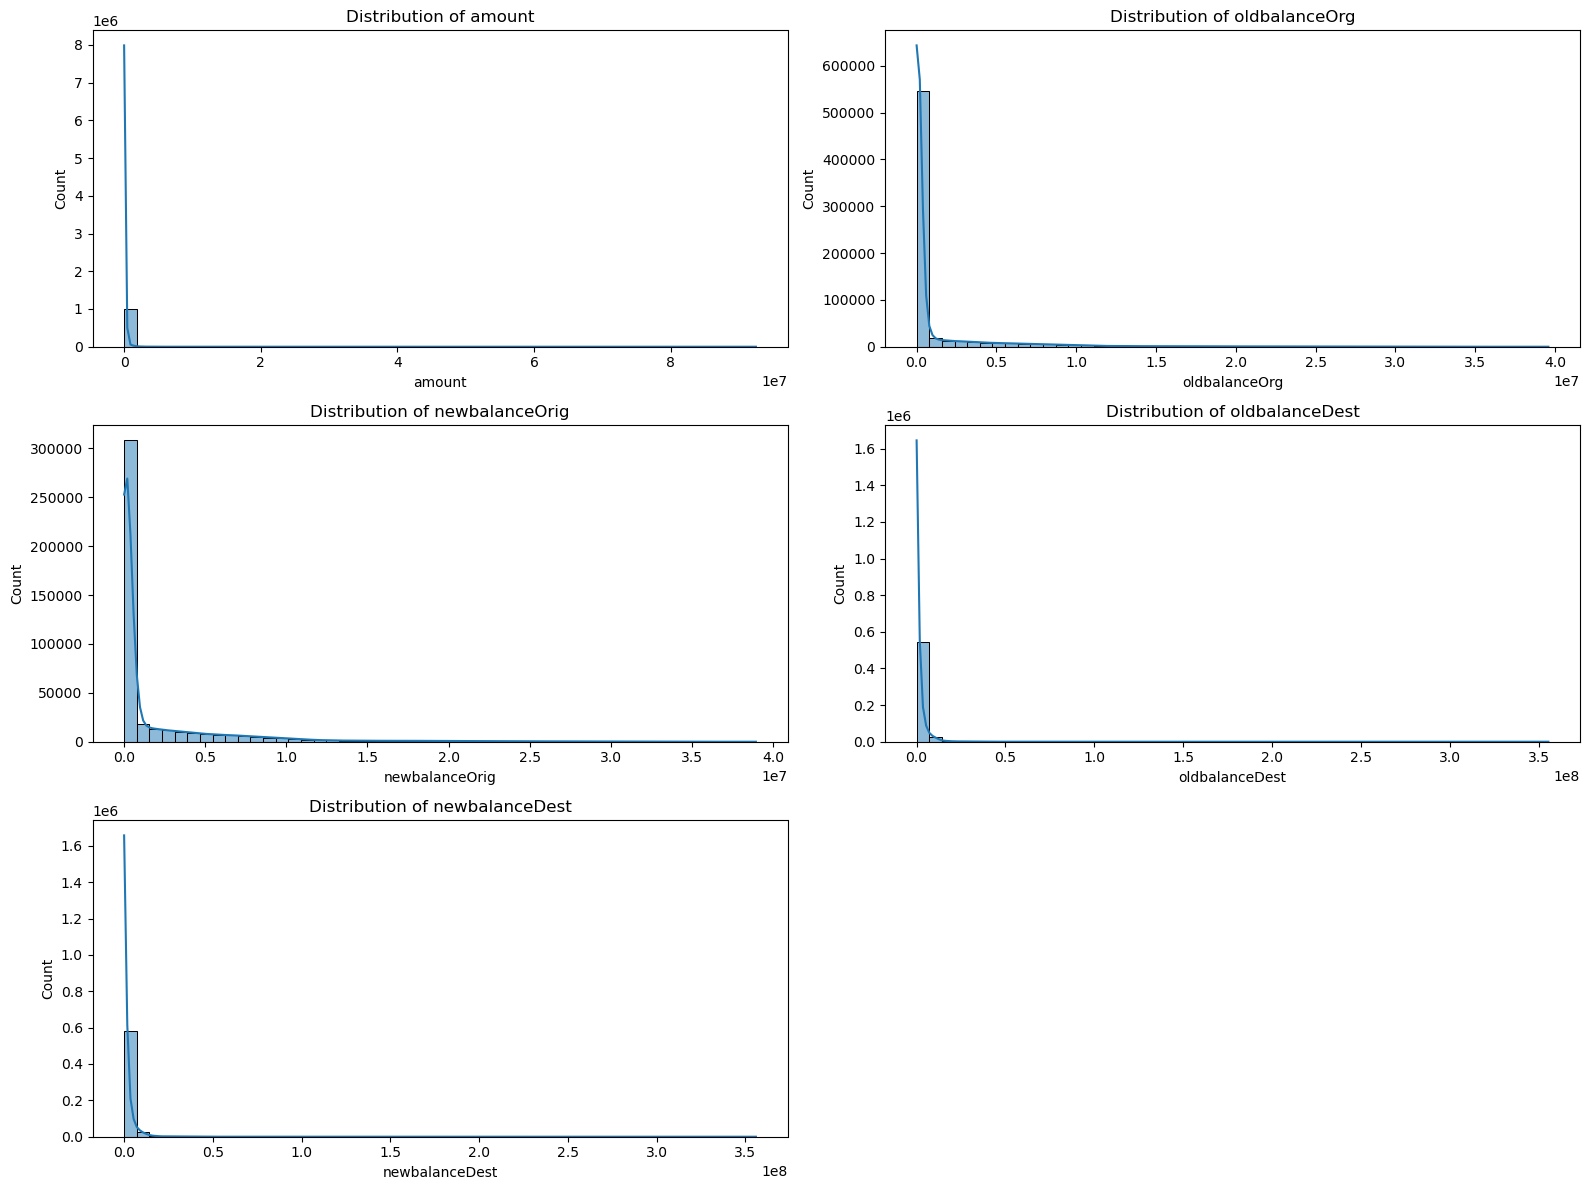

In [ ]:
# This cell performs a step in the EDA process
import matplotlib.pyplot as plt
import seaborn as sns
# in this viualization, I will skip 0s for clearer scale.
# I will also use seaborn to make the plot more visually appealing
# List of numeric columns to plot
# 0 values can distort the scale, so we filter them out for better visualization.
# Univariate Analysis: Helps us understand normal vs. rare behavior in each feature.

numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(transactions[col][transactions[col] > 0], bins=50, kde=True)  # skip 0s for clearer scale
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


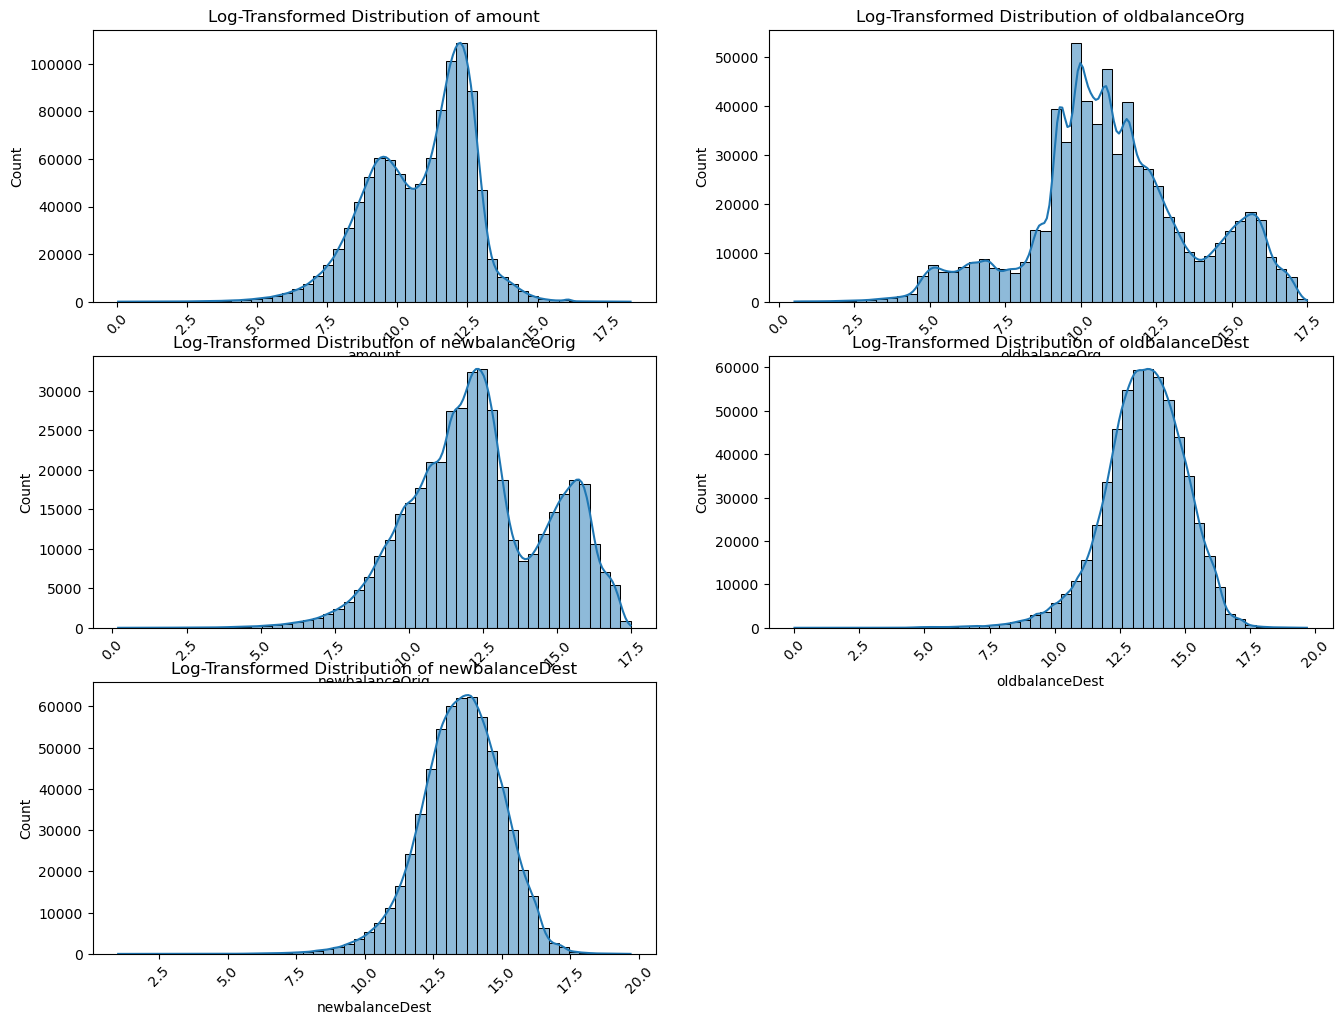

In [48]:
# lets plot the same graph with log transformations on the numeric columns.
# remember log transform is log(x + 1) to avoid log(0)
# also log transorm is only applied to positive values.
# also log transformations make larger values more compact and smaller values more spread out.
# This can help reveal patterns in right-skewed data.
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(np.log1p(transactions[col][transactions[col] > 0]), bins=50, kde=True)  # log transform and skip 0s
    plt.title(f"Log-Transformed Distribution of {col}")
    plt.xticks(rotation=45)
    #plt.xlabel(f'Log of {col}')
    

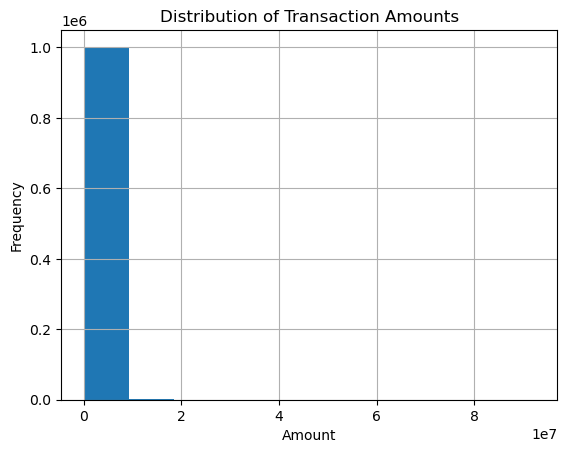

In [17]:
# This cell performs a step in the EDA process

transactions['amount'].hist(bins=10)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

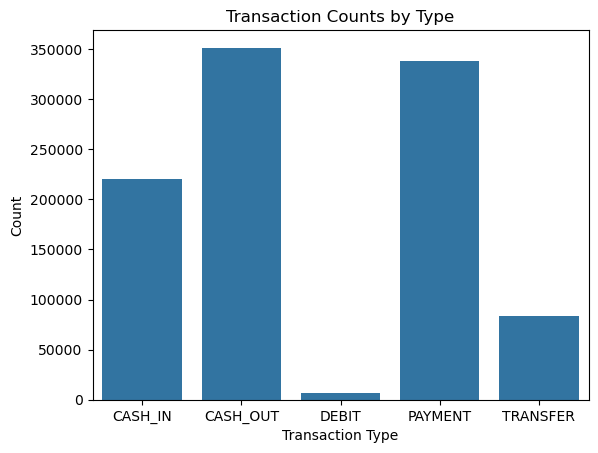

In [16]:
# Group by transaction type and calculate fraud rates and visualize.
type_df = transactions.groupby('type')['isFraud'].count().reset_index()
type_df.columns = ['Transaction Type', 'Count']
sns.barplot(x='Transaction Type', y='Count', data=type_df)
plt.title("Transaction Counts by Type")
plt.show()

In [20]:
# This cell performs a step in the EDA process
transactions_df = pd.read_csv("../data/bank_transactions.csv")
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numeric_cols:
    transactions_df[col] = transactions_df[col].apply(lambda x: x if x >= 0 else 0)

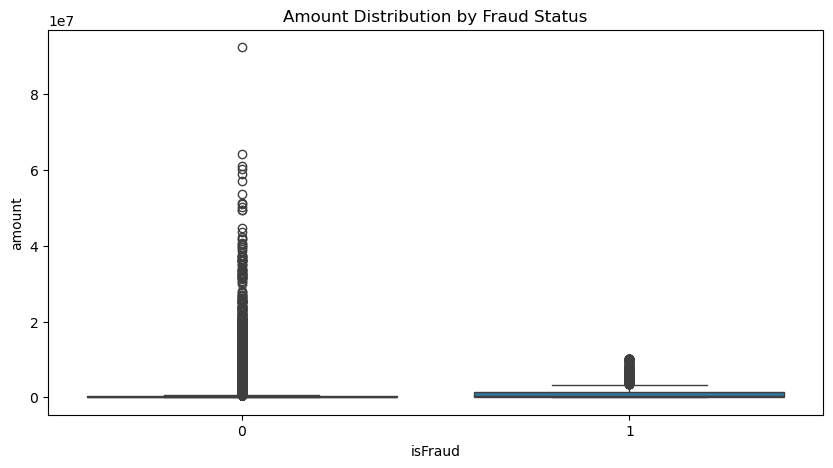

In [21]:
# Example: Fraud rates by transaction type


# Example: Fraud transactions vs amount
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x='isFraud', y='amount', data=transactions_df)
plt.title("Amount Distribution by Fraud Status")
plt.show()

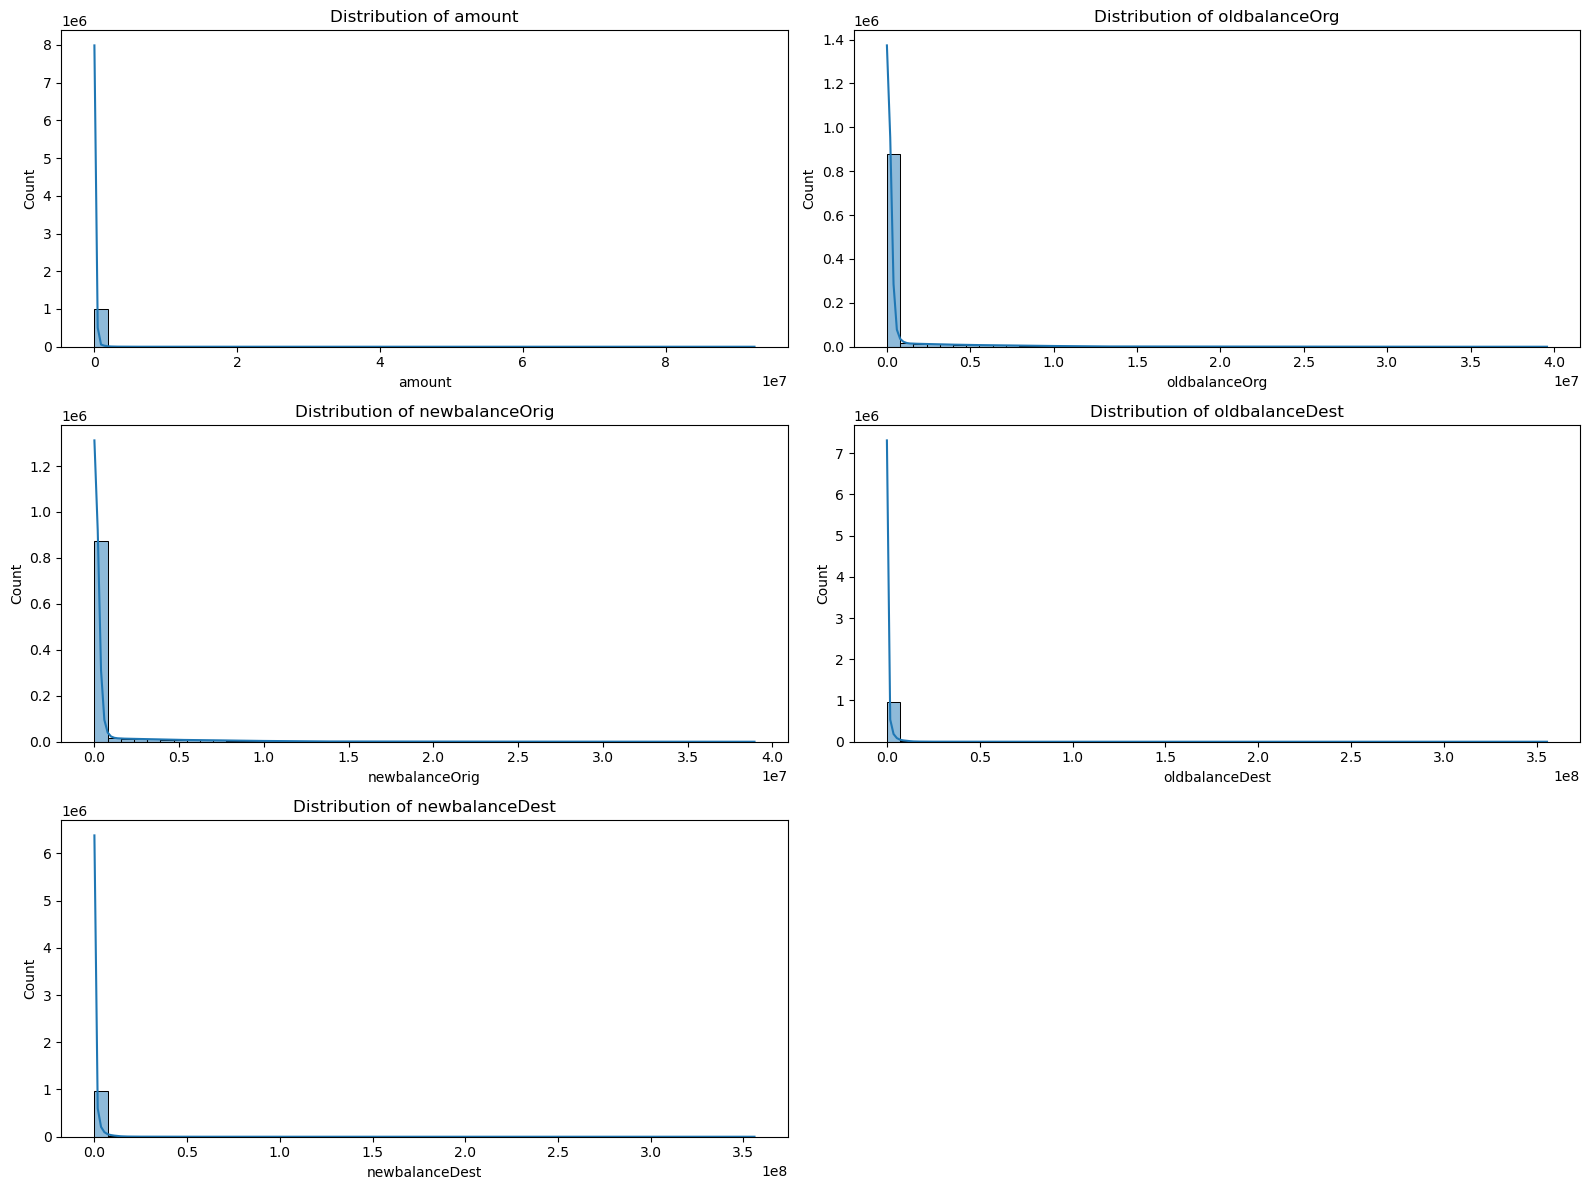

In [ ]:
# --- Univariate Histograms ---
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(transactions_df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Personally my pc took forever to run that so I might just drop some columns from here.


### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### All numerics features are highly right-skewed, meaning the majority of the transactions involve small amounts or balances. A few large transactions dominate the upper tail. This justifies using log transformations and explains why certain models may struggle without proper pre processing.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

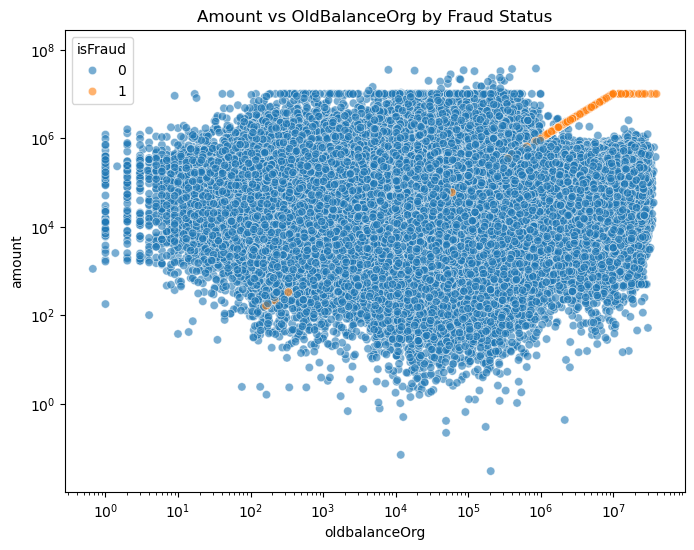

In [ ]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions_df, x='oldbalanceOrg', y='amount', hue='isFraud', alpha=0.6)
plt.title("Amount vs OldBalanceOrg by Fraud Status")
plt.xscale('log')
plt.yscale('log')
plt.show()
# The original balance of the origin account is often equal to the transaction amount for frauds. This suggests fraudsters often empty out the origin account.


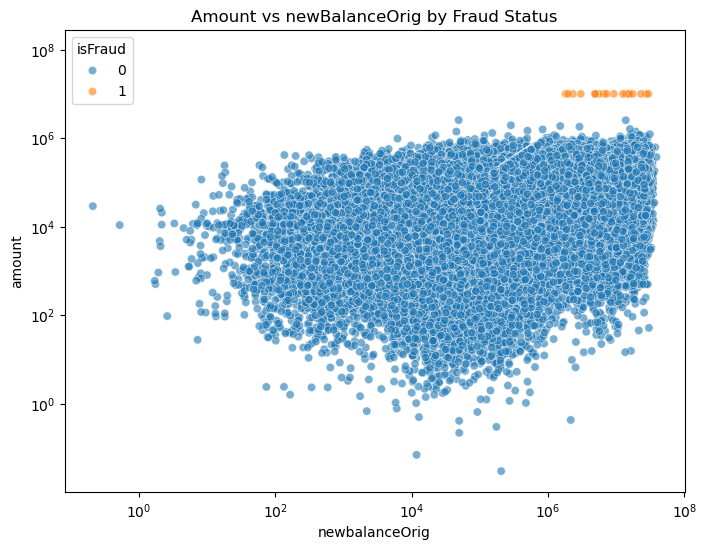

In [ ]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions_df, x='newbalanceOrig', y='amount', hue='isFraud', alpha=0.6)
plt.title("Amount vs newBalanceOrig by Fraud Status")
plt.xscale('log')
plt.yscale('log')
plt.show()
# The original balance of the origin account is often equal to the transaction amount for frauds after the transaction
# This suggests fraudsters often empty out the origin account.


C:\Users\Moe\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


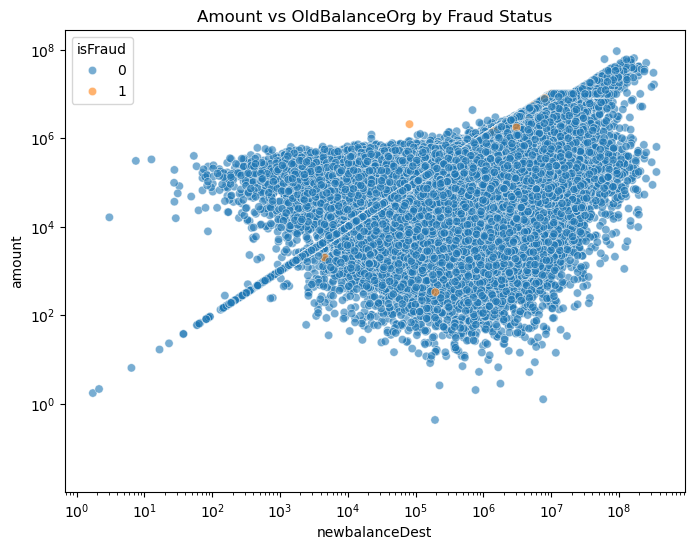

In [57]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions_df, x='newbalanceDest', y='amount', hue='isFraud', alpha=0.6)
plt.title("Amount vs newbalanceDest by Fraud Status")
plt.xscale('log')
plt.yscale('log')
plt.show()


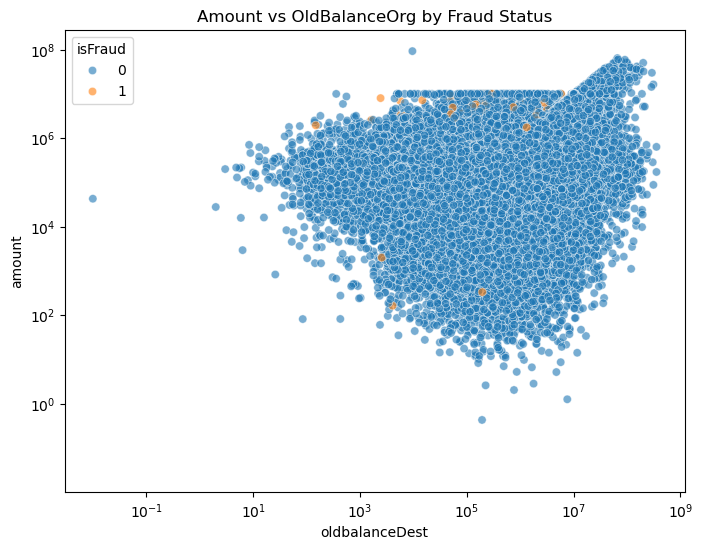

In [58]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions_df, x='oldbalanceDest', y='amount', hue='isFraud', alpha=0.6)
plt.title("Amount vs OldBalanceDest by Fraud Status")
plt.xscale('log')
plt.yscale('log')
plt.show()


## All of the oldbalanceDest transfers are extremely high.

C:\Users\Moe\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


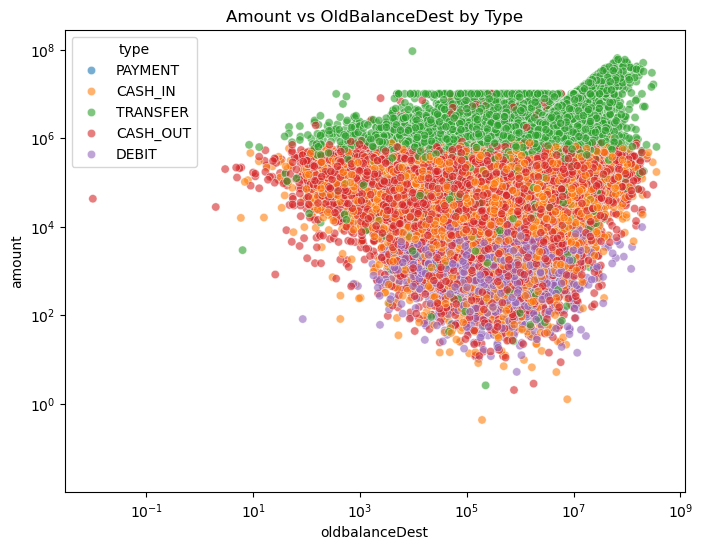

In [ ]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions_df, x='oldbalanceDest', y='amount', hue='type', alpha=0.6)
plt.title("Amount vs OldBalanceDest by Type")
plt.xscale('log')
plt.yscale('log')
plt.show()


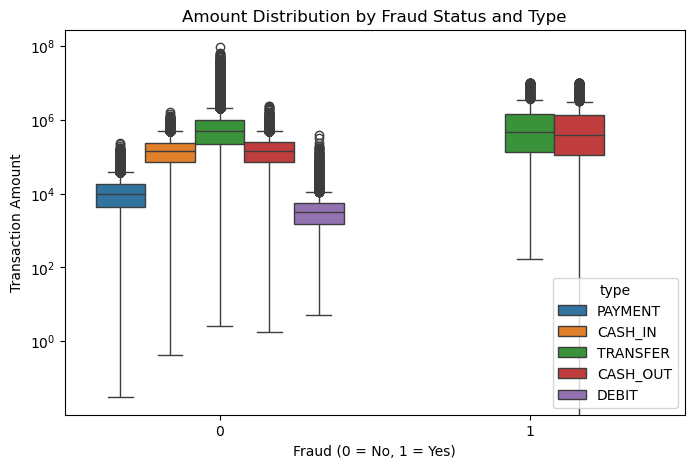

In [90]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 5))
sns.boxplot(data=transactions, x='isFraud', y='amount',hue='type')
plt.title("Amount Distribution by Fraud Status and Type")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount")
plt.yscale('log')
plt.show()


C:\Users\Moe\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


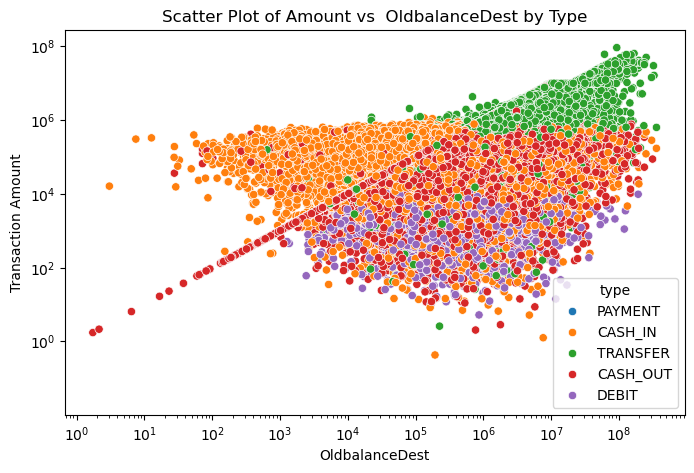

In [93]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions_df,x='newbalanceDest',y='amount',hue='type')
plt.title("Scatter Plot of Amount vs  OldbalanceDest by Type")
plt.xlabel("OldbalanceDest")
plt.ylabel("Transaction Amount")
plt.yscale('log')
plt.xscale('log')
plt.show()


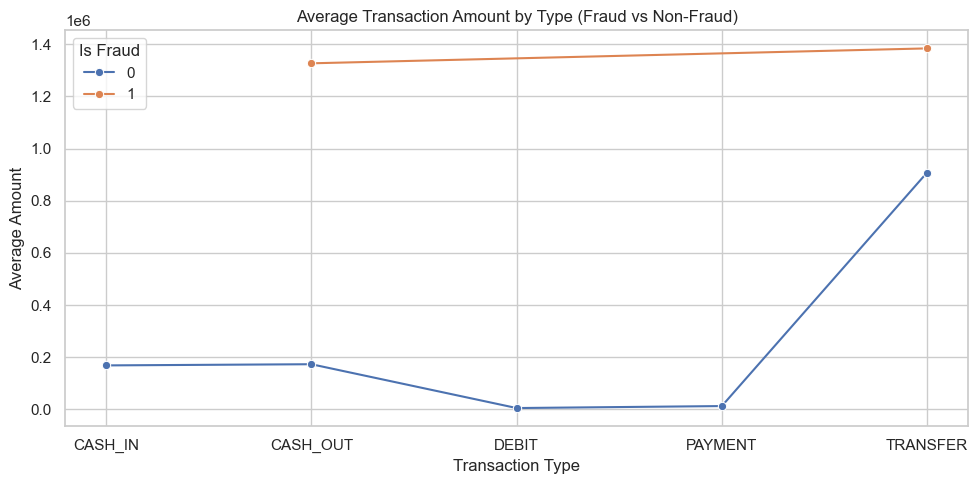

In [96]:
# This cell performs a step in the EDA process
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Group and plot
grouped = transactions_df.groupby(["type", "isFraud"])["amount"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x="type", y="amount", hue="isFraud", marker="o")
plt.title("Average Transaction Amount by Type (Fraud vs Non-Fraud)")
plt.ylabel("Average Amount")
plt.xlabel("Transaction Type")
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()


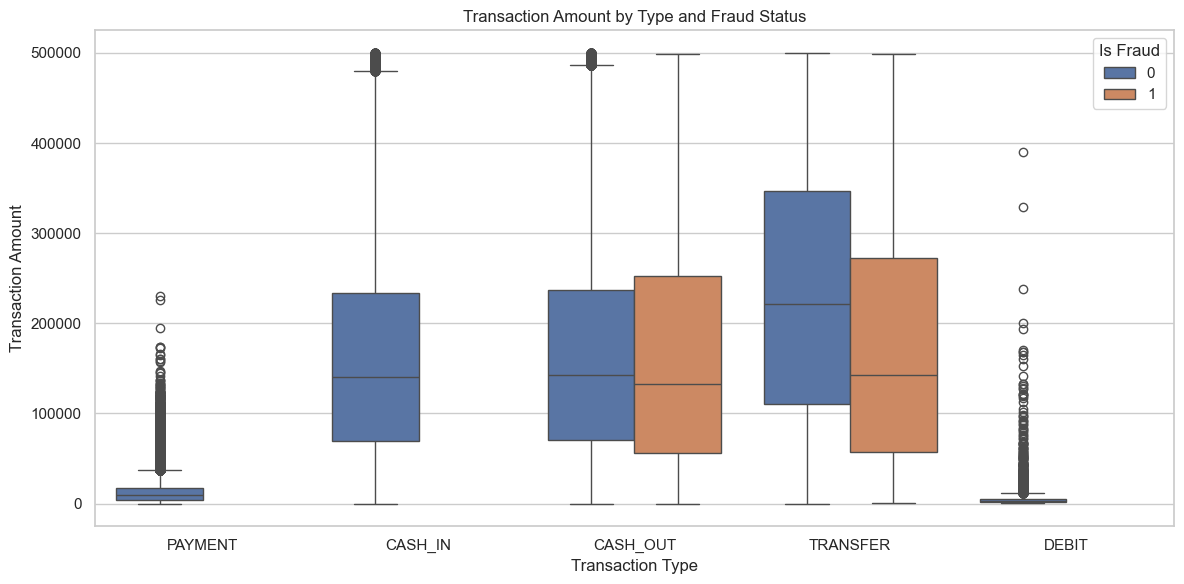

In [98]:
# This cell performs a step in the EDA process
plt.figure(figsize=(12, 6))
sns.boxplot(data=transactions_df[transactions_df["amount"] < 500000],  # trim for visibility
            x="type", y="amount", hue="isFraud")
plt.title("Transaction Amount by Type and Fraud Status")
plt.ylabel("Transaction Amount")
plt.xlabel("Transaction Type")
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()



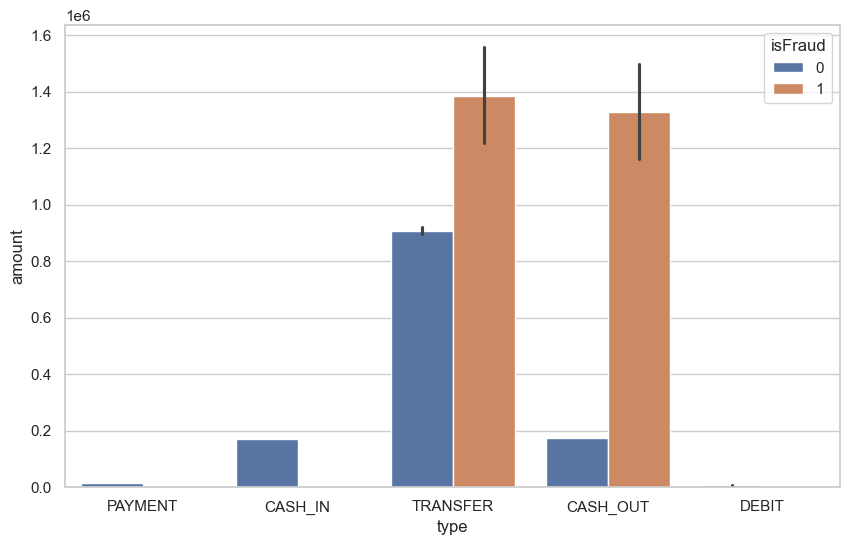

In [101]:
# plot some bar charts using the hue paramater.
plt.figure(figsize=(10, 6))
sns.barplot(data=transactions_df,x='type',y='amount',hue='isFraud')
plt.show()




### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

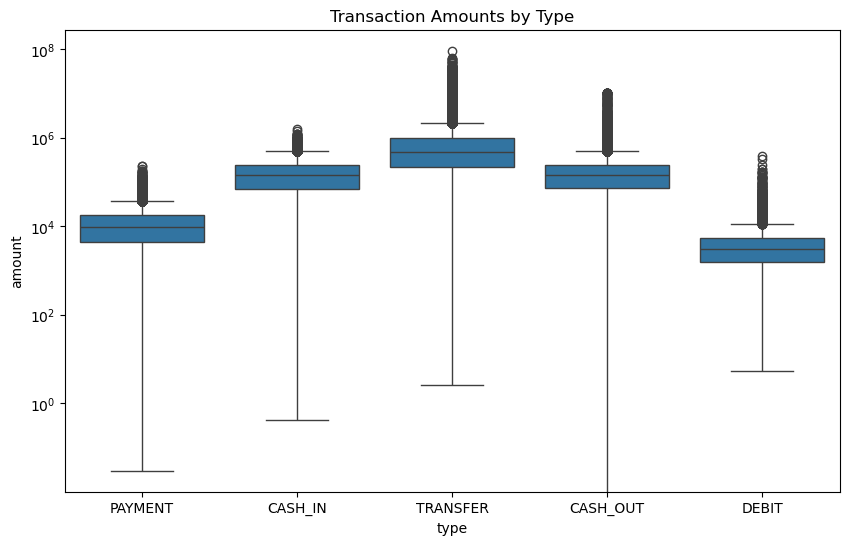

In [ ]:
# This cell performs a step in the EDA process
plt.figure(figsize=(10, 6))
sns.boxplot(data=transactions_df, x='type', y='amount')
plt.title("Transaction Amounts by Type")
plt.yscale('log')  # Makes large value range easier to see
plt.show() # Remember our data is right skewed so log scale is better. I perform this directly on the plot. 
# we will perform log transform later in preprocessing if needed.
# Transfer and Cash Out have the highest amounts.
# These may be the most risky transaction types.
# This insight may justifying encoding the type column as ordinal based on risk level.
# Maybe we can weigh transaction types based on risk level.


## Transferand Casout Types involves larger amounts, they maybe be easy prey for fraud targets.

Text(0.5, 1.0, 'Fraud Rate by Transaction Type')

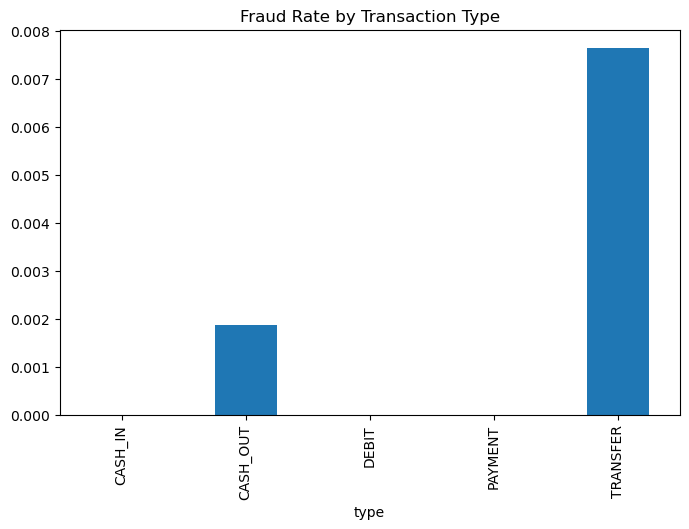

In [ ]:
# This cell performs a step in the EDA process
type_fraud_rate = transactions_df.groupby('type')['isFraud'].mean()
type_fraud_rate.plot(kind='bar', figsize=(8, 5))
plt.title("Fraud Rate by Transaction Type")
# The Transfer and Cash Out types have the highest fraud rates.
#  These maybe be easy prey for fraud targets.
# Transfer has a .007 fraud rate, Cash Out has a 0.004 fraud rate.
# That fraud rate is much higher than other cash out transaction types.

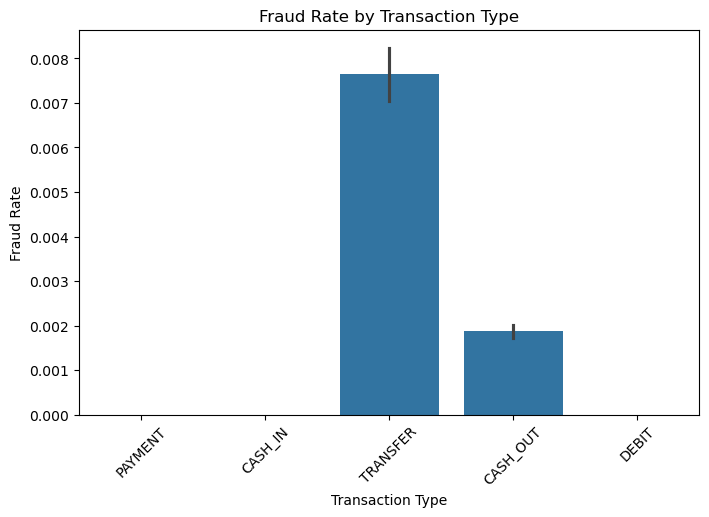

In [ ]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 5))
sns.barplot(data=transactions_df, x="type", y="isFraud", estimator=np.mean)
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.show()


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

In [ ]:
# This cell performs a step in the EDA process
transactions_df['isFlaggedFraud'].value_counts()
# there is only 1 flagged fraud transaction. This column is not useful for modeling.

isFlaggedFraud
0    999999
1         1
Name: count, dtype: int64

In [ ]:
# This cell performs a step in the EDA process
pd.crosstab(transactions_df['isFlaggedFraud'], transactions_df['isFraud'], normalize='index')
# the crosstab shows that the single flagged fraud transaction was not actually fraud.
# This column is not useful for modeling.We will drop it.

isFraud,0,1
isFlaggedFraud,,
0,1.00,0.00
1,0.00,1.00


## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here

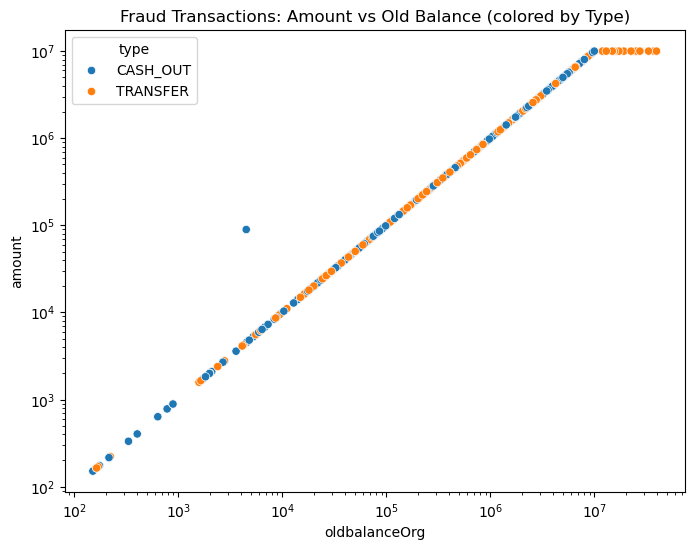

In [ ]:
# I chose this visualization to see if there is any correlation between old balance and transaction amount for fraudulent transactions.
# It can help identify patterns in fraud behavior, such as whether fraudsters tend to target accounts with certain balance levels.
# I also chose this visualization to see if there is any correlation between new balance and transaction amount for fraudulent transactions.
# It can help identify patterns in fraud behavior, such as whether fraudsters tend to target accounts with certain balance levels.
# So Fraud tends to happen when the old balance is equal to the transaction amount.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions_df[transactions_df['isFraud'] == 1], x='oldbalanceOrg', y='amount', hue='type')
plt.title("Fraud Transactions: Amount vs Old Balance (colored by Type)")
plt.xscale('log')
plt.yscale('log')
plt.show()


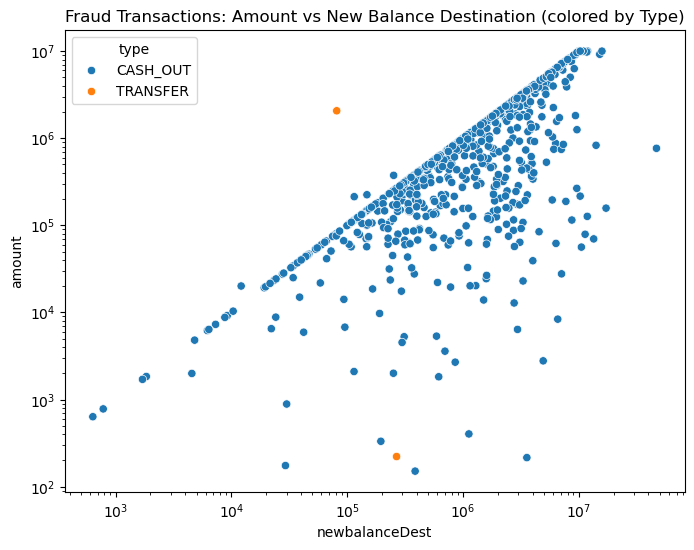

In [ ]:
# This cell performs a step in the EDA process
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions_df[transactions_df['isFraud'] == 1], x='newbalanceDest', y='amount', hue='type')
plt.title("Fraud Transactions: Amount vs New Balance Destination (colored by Type)")
plt.xscale('log')
plt.yscale('log')
plt.show()
# alot of time the Destination balance is 0. This means fraudsters often empty out the destination account.
# The balance of the destination account is often the same as the transaction amount. This means fraudsters often empty out the destination account.

In [63]:
# Lets do some feature processing and engineering next.
#transactions_df.drop(columns=['isFlaggedFraud'], inplace=True)  # Drop useless column
#transactions_df['log_amount'] = np.log1p(transactions_df['amount'])  # Log transform amount to reduce skew

#transactions_df['sender_balance_change'] = transactions_df['oldbalanceOrg'] - transactions_df['newbalanceOrig']
transactions_df['log_origin_account_balance'] = np.log1p(transactions_df['oldbalanceOrg'] - transactions_df['newbalanceOrig']).clip(lower=0)# Balance change feature
transactions_df['log_dest_account_balance'] = np.log1p(transactions_df['newbalanceDest']-transactions_df['oldbalanceDest']).clip(lower=0)
#transactions_df['log_newbalanceOrig'] = np.log1p(transactions_df['newbalanceOrig'])  # Log transform newbalanceOrig
#transactions_df['log_oldbalanceOrg'] = np.log1p(transactions_df['oldbalanceOrg'])  # Log transform oldbalanceOrg
#transactions_df['log_oldbalanceDest'] = np.log1p(transactions_df['oldbalanceDest'])  # Log transform oldbalanceDest
#transactions_df['log_newbalanceDest'] = np.log1p(transactions_df['newbalanceDest'])  # Log transform newbalanceDest 


c:\Users\Moe\anaconda3\envs\ds\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Moe\anaconda3\envs\ds\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Frequency'>

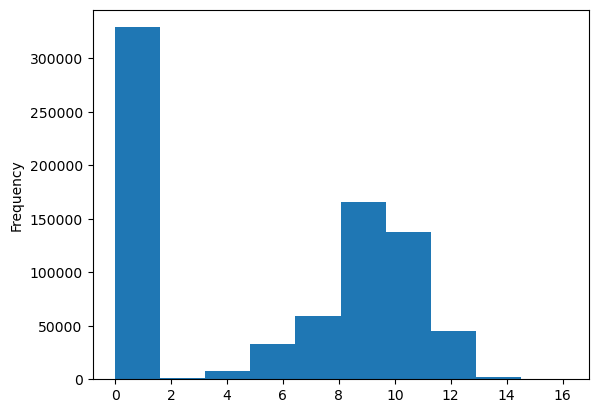

In [64]:
# This cell performs a step in the EDA process
transactions_df['log_origin_account_balance'].plot(kind='hist')

<Axes: ylabel='Frequency'>

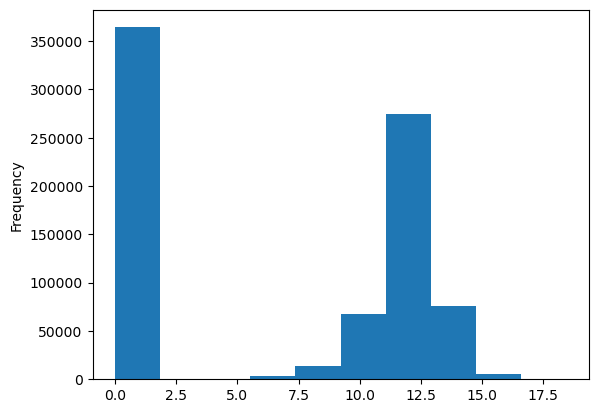

In [65]:
# This cell performs a step in the EDA process
transactions_df['log_dest_account_balance'].plot(kind='hist')

<Axes: ylabel='Frequency'>

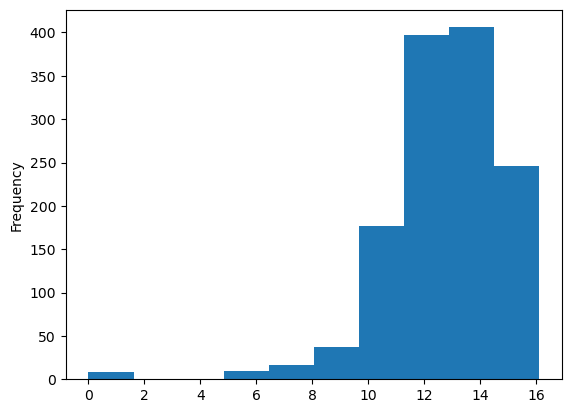

In [ ]:
# This cell performs a step in the EDA process
transactions_df[transactions_df['isFraud']==1]['log_origin_account_balance'].plot(kind='hist')
# Most of the values in the origin account balance are clustered on positive side signifying Money in the bank or  a stable balance.

<Axes: ylabel='Frequency'>

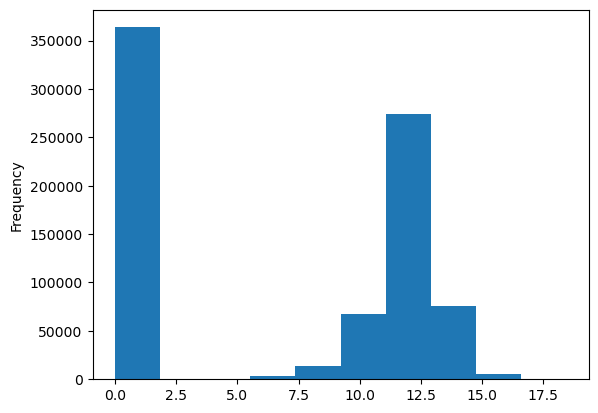

In [ ]:
# This cell performs a step in the EDA process
transactions_df[transactions_df['isFraud']==0]['log_dest_account_balance'].plot(kind='hist')
#  A high count of non fraudilent cases have a positive account balance signifying income or funds.

<Axes: ylabel='Frequency'>

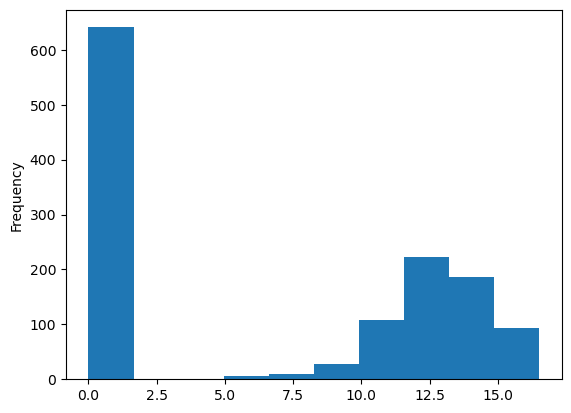

In [ ]:
# This cell performs a step in the EDA process
transactions_df[transactions_df['isFraud']==1]['log_dest_account_balance'].plot(kind='hist')
# Most of the values here are clustered around the 0 values identifying the brokies who are trying to recieve fraudilent income.

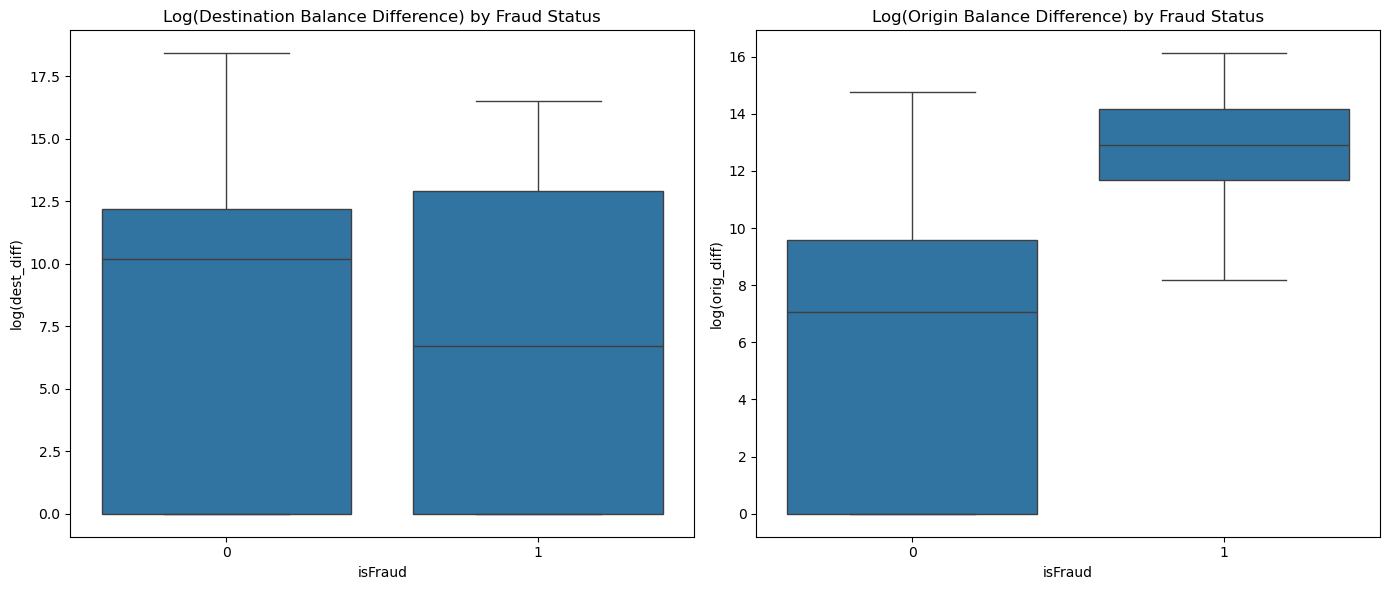

In [ ]:
# This cell performs a step in the EDA process
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=transactions_df[['log_dest_account_balance']],x=transactions_df['isFraud'],y =transactions_df['log_dest_account_balance'],showfliers=False)
plt.title("Log(Destination Balance Difference) by Fraud Status")
plt.xlabel("isFraud")
plt.ylabel("log(dest_diff)")
plt.subplot(1, 2, 2)
sns.boxplot(data=transactions_df[['log_origin_account_balance']], x=transactions_df['isFraud'], y=transactions_df['log_origin_account_balance'], showfliers=False)
plt.title("Log(Origin Balance Difference) by Fraud Status")
plt.xlabel("isFraud")
plt.ylabel("log(orig_diff)")

plt.tight_layout()
plt.show()
# The median value for the recievers balance difference was lower for Fraudelent cases,
# The Median Value for fraudilent cases in the balance difference in Originators accounts was much higher.
# The Median Value for the non fraudilent cases was higher in the recievers balances after the transaction took place.

In [107]:
# This cell performs a step in the EDA process
transactions_df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_origin_account_balance,log_dest_account_balance
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0,6.89,0.00
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0,10.92,0.00
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0,NaN,NaN
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0,0.00,14.67
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0,0.00,11.13
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,C768838592,114122.11,100516.04,M1593119373,0.00,0.00,0,0,9.52,0.00
999996,PAYMENT,9139.61,C1912748675,0.00,0.00,M842968564,0.00,0.00,0,0,0.00,0.00
999997,CASH_OUT,153650.41,C1494179549,50677.00,0.00,C1560012502,0.00,380368.36,0,0,10.83,12.85
999998,CASH_OUT,163810.52,C116856975,0.00,0.00,C1348490647,357850.15,521660.67,0,0,0.00,12.01


In [ ]:
# This cell performs a step in the EDA process
